In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import pickle
import numpy as np
import pathlib
import matplotlib.pyplot as plt

IMG_SIZE  = (331,331)
IMG_SHAPE = IMG_SIZE +(3,)


#1. load model
loaded_model = tf.keras.models.load_model('pretrained_models/EfficientNetB7_Model.h5')

#2. load class names
with open ('data/class_names', 'rb') as fp:
    class_names = pickle.load(fp)


In [15]:
#3. create prediction function
def make_custom_prediction(model, image_path):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SHAPE) 
  img_g = np.expand_dims(img, axis=0)
  custom_predict = model.predict(img_g)
  plt.figure(figsize=(4,4))
  plt.imshow(img)
  plt.title(f"{class_names[np.argmax(custom_predict[0])]}  ({round(np.max(custom_predict[0]*100))}% confidence)")
  plt.grid()
  plt.axis(False)
  plt.show()
  # print(f"Predicted label: {[np.argmax(custom_predict[0])]}")
  # print(f"Probability of prediction): {round(np.max(custom_predict[0])) * 100} %")

1/1 [==============================] - 1s 725ms/step


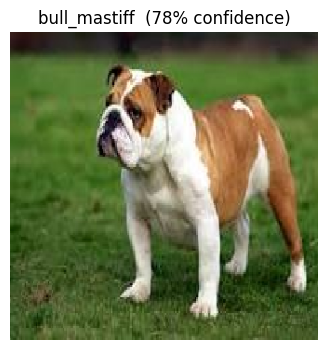

1/1 [==============================] - 1s 733ms/step


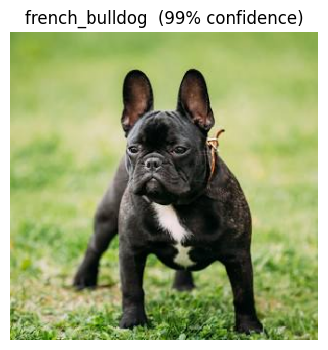

1/1 [==============================] - 1s 822ms/step


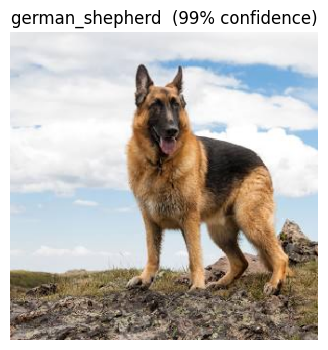

1/1 [==============================] - 1s 836ms/step


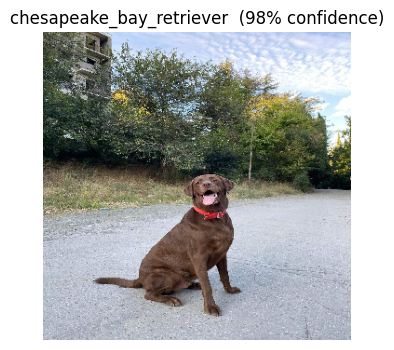

In [16]:
paths = pathlib.Path('data/custom_data')
for img_path in list(paths.glob('*')):
    make_custom_prediction(loaded_model, img_path)